In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# Ventas Mensuales

In [ ]:
# Importar la base limpia
ventas = pd.read_excel("VM_Limpio.xlsx")

In [58]:
ventas_long = ventas.melt(id_vars=["Date - Mes"], var_name="Producto", value_name="Ventas")
ventas_long["Fecha"] = pd.to_datetime(ventas_long["Date - Mes"]) #Convertir decha a datetime
ventas_long["Año"] = ventas_long["Fecha"].dt.year
ventas_long["Mes"] = ventas_long["Fecha"].dt.month_name(locale='es_ES')

orden_meses = [
    "enero", "febrero", "marzo", "abril", "mayo", "junio",
    "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"
]
ventas_long["Mes"] = ventas_long["Mes"].str.lower()
ventas_long["Mes"] = pd.Categorical(ventas_long["Mes"], categories=orden_meses, ordered=True)

# Medidas estadisticas
ventas_long.groupby("Producto")["Ventas"].describe()

,count,mean,std,min,25%,50%,75%,max
Producto,,,,,,,,
LAMINA EN CALIENTE,84.0,10959.359185,3824.865306,5171.505232,7863.619421,10172.342530,13147.617290,22955.837501
LAMINA EN FRIO,84.0,1603.408096,705.336337,600.175000,934.466500,1615.564619,2121.004218,3309.644228
LAMINA GALVANIZADA,84.0,581.371209,419.442213,103.341000,182.394260,531.731928,948.639368,1575.106329
PERFILES COMERCIALES,84.0,4079.685368,816.082656,2669.081000,3418.461206,4095.055683,4621.846900,6196.523457
PERFILES ESTRUCTURALES,84.0,9930.702392,1579.331810,5749.595881,8815.746112,9917.859658,11009.609224,15987.114025
PLACA DE HOJA,84.0,2189.012928,673.053023,885.906000,1729.556976,2117.374398,2452.326275,4663.174572
PLACA DE ROLLO,84.0,12247.235314,3162.814388,6520.761081,9823.193245,11574.177803,14180.522619,19872.553662


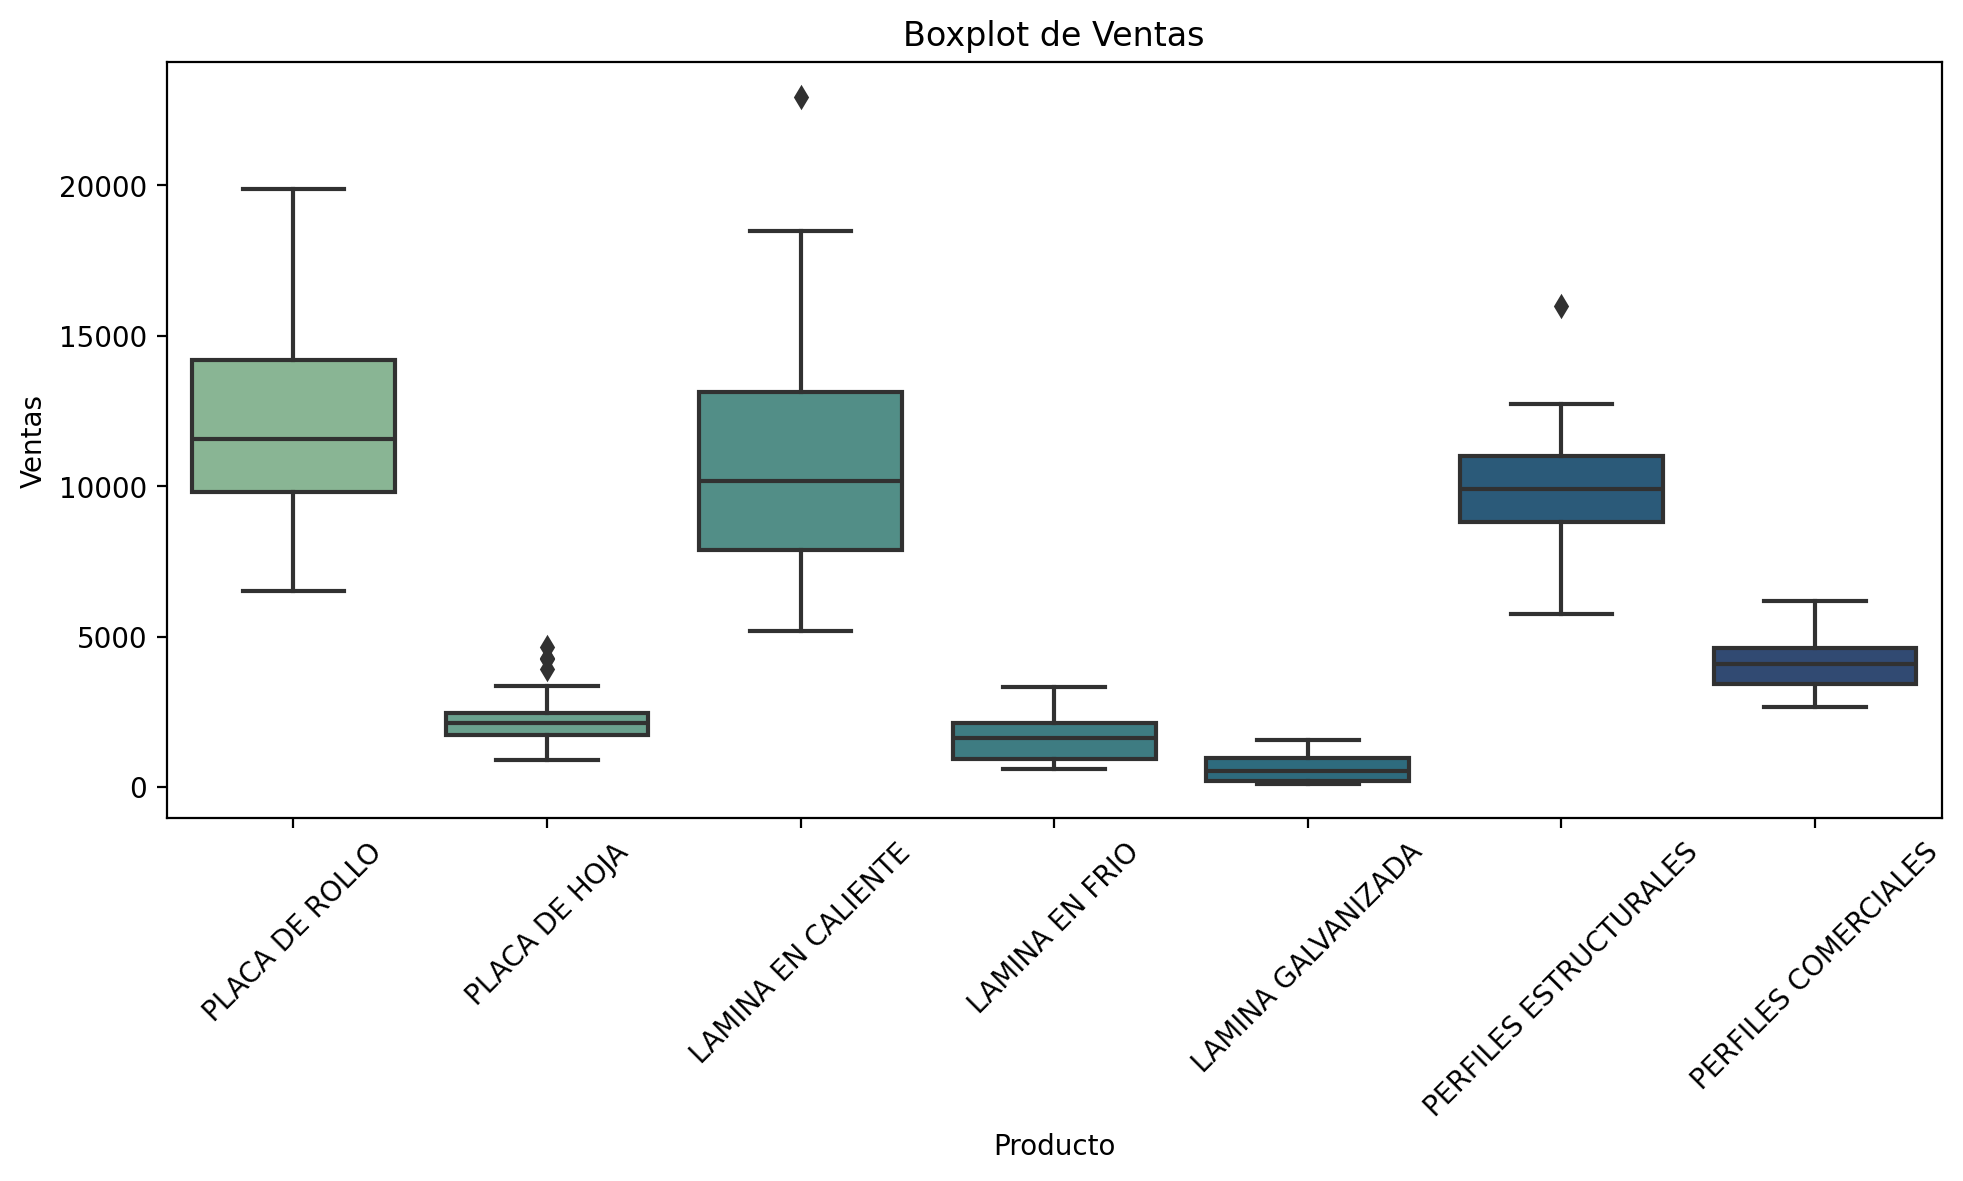

In [59]:
# Boxplot de las ventas por productos
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_long, x="Producto", y="Ventas", palette="crest")
plt.title("Boxplot de Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

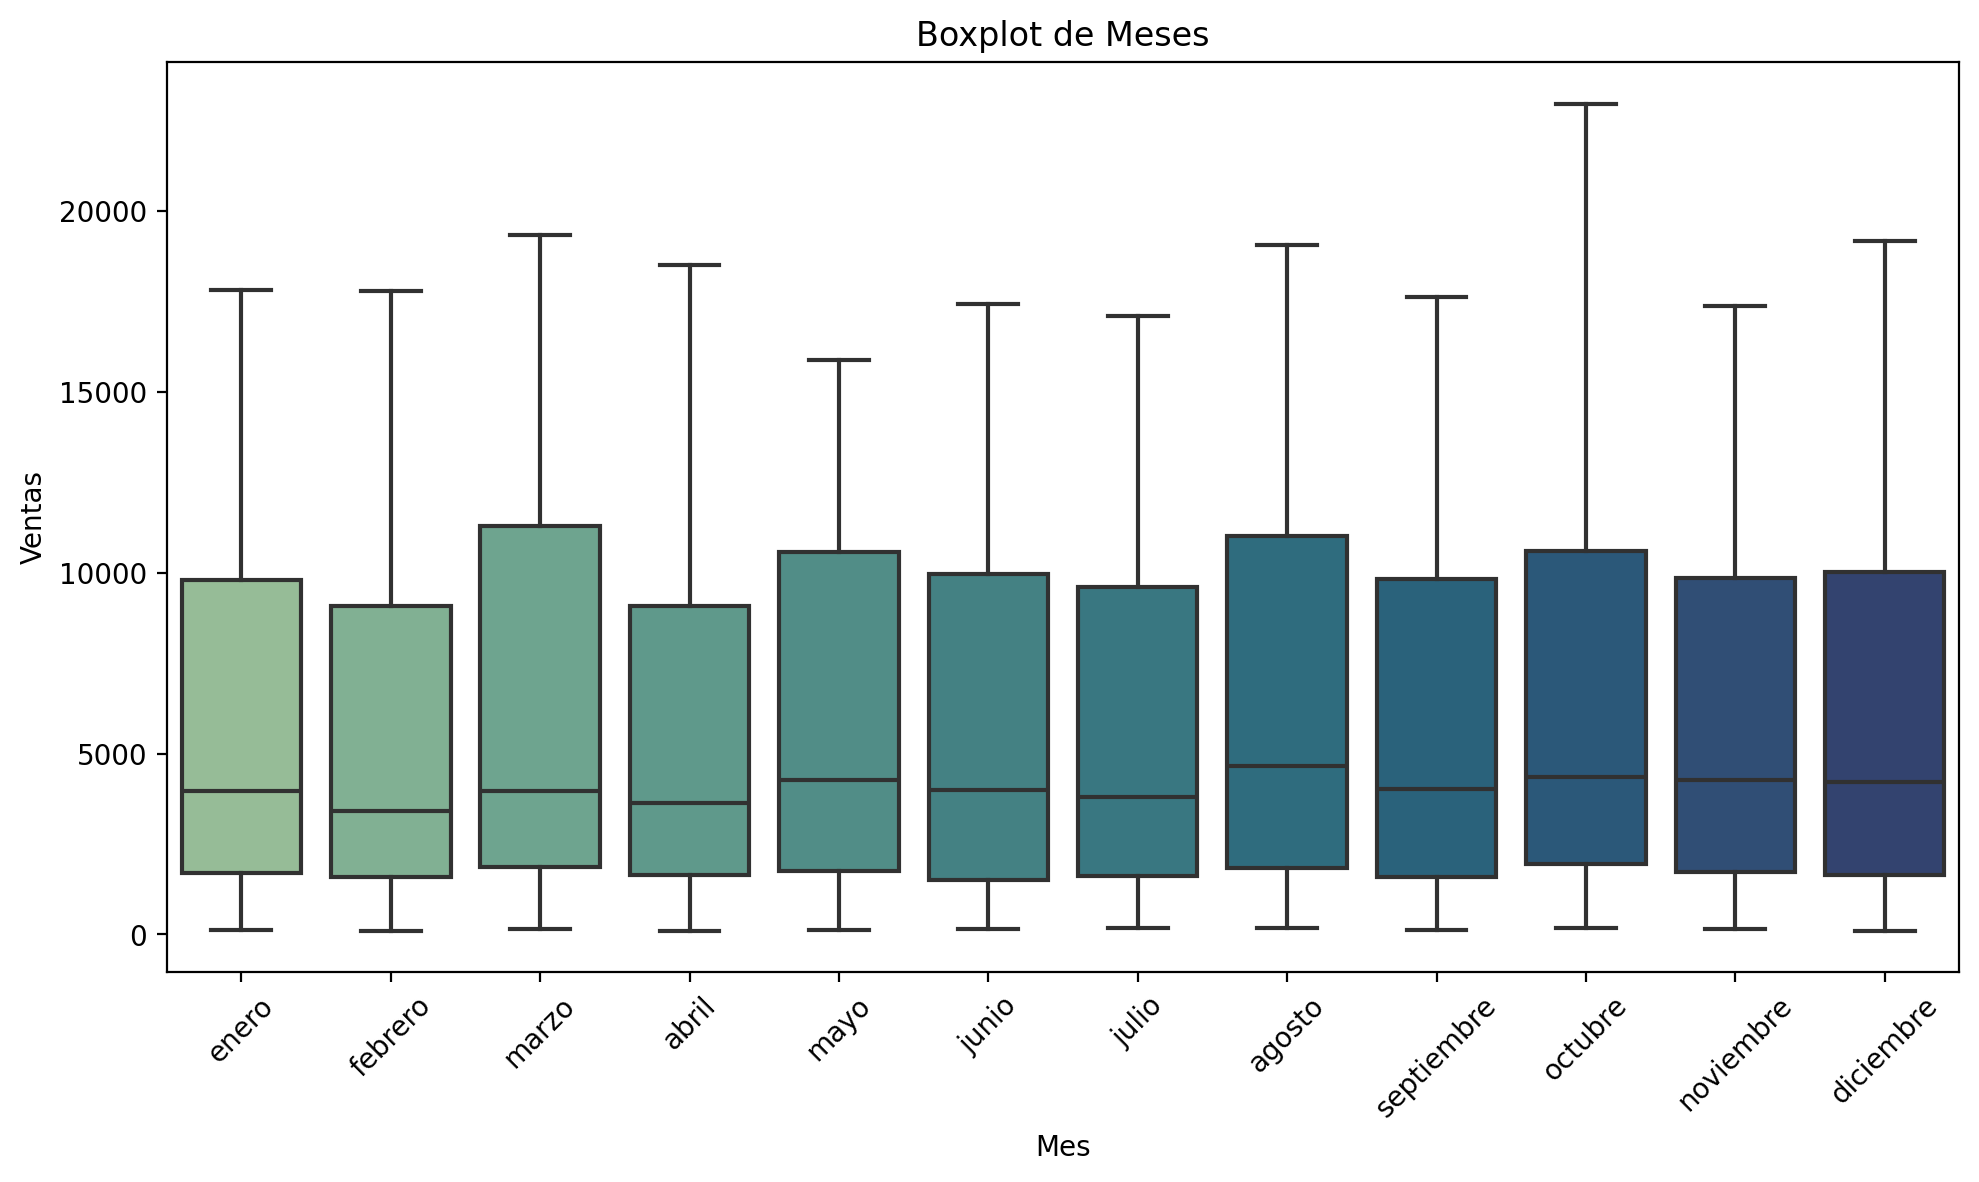

In [60]:
# Boxplot de las ventas por mes
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_long, x="Mes", y="Ventas", palette="crest")
plt.title("Boxplot de Meses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

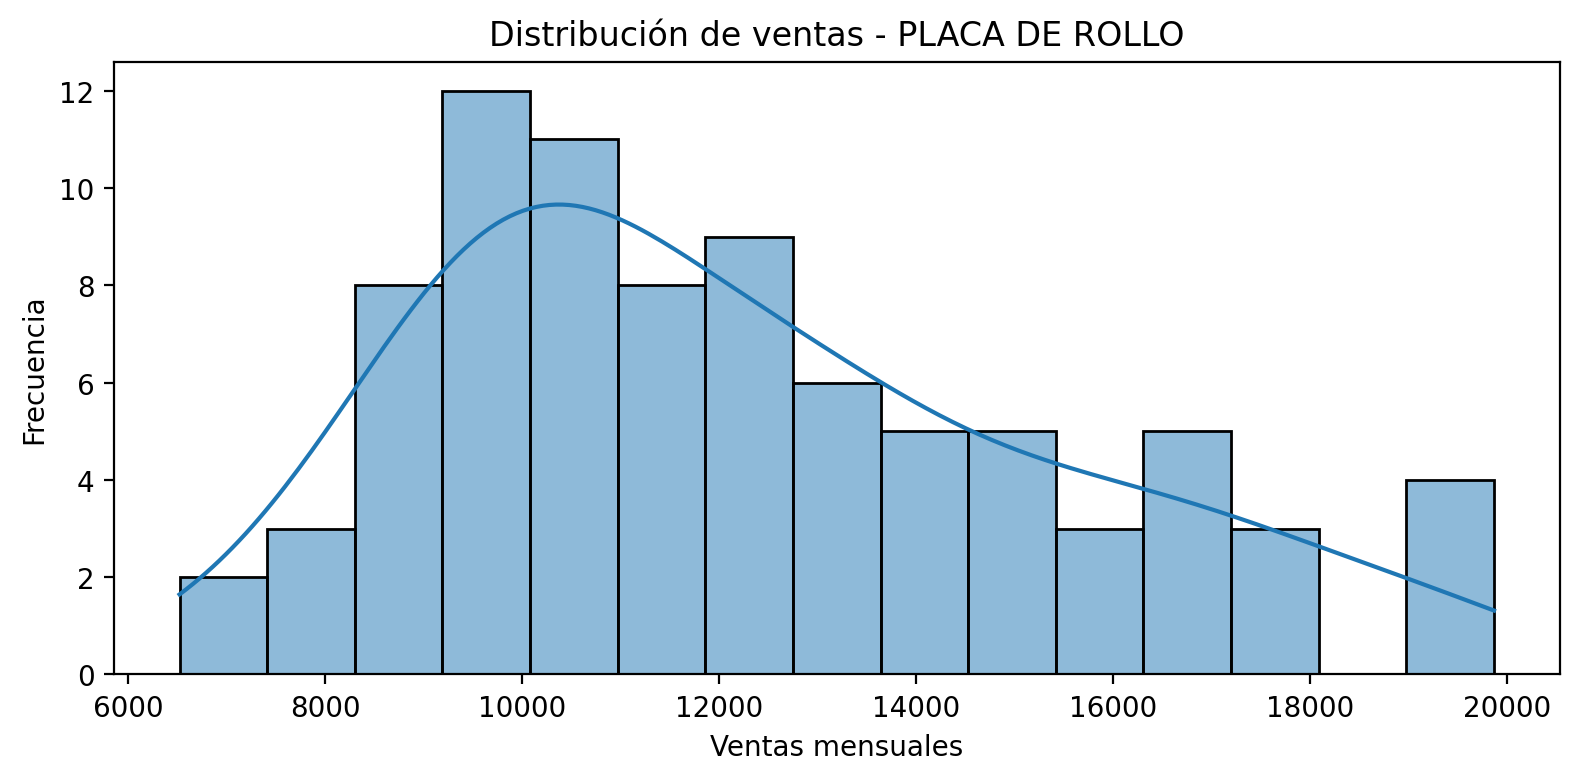

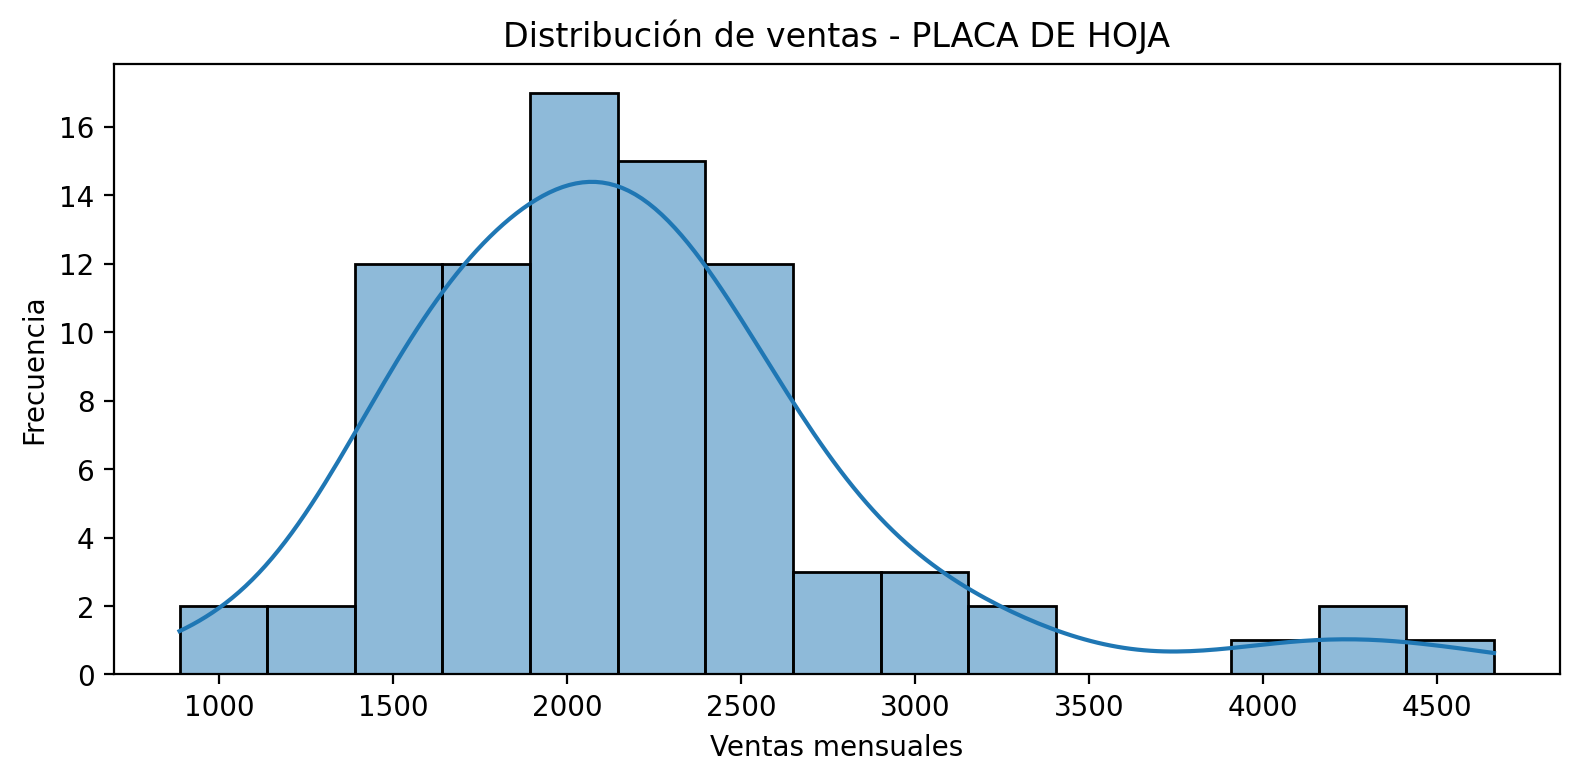

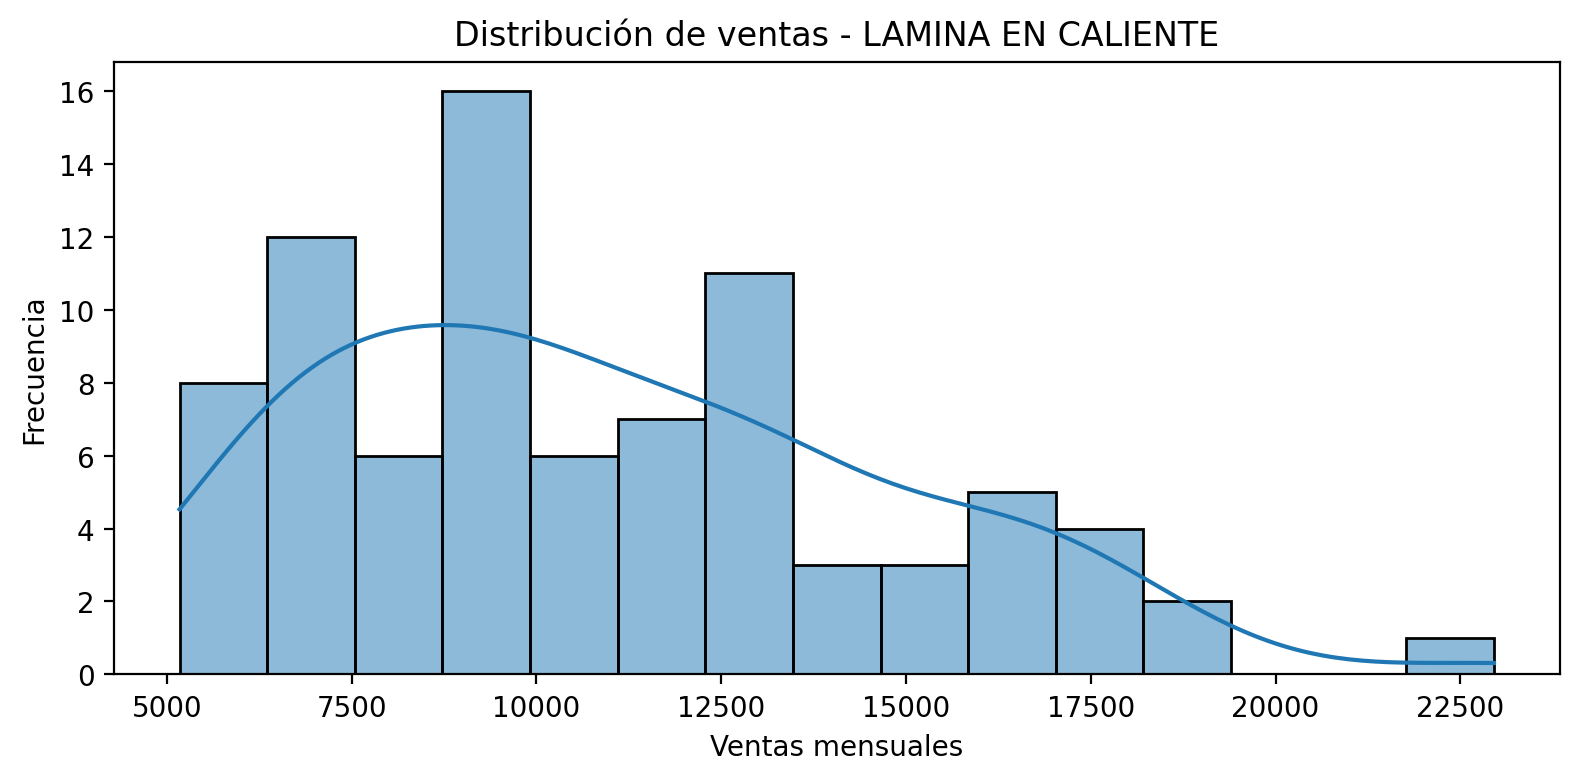

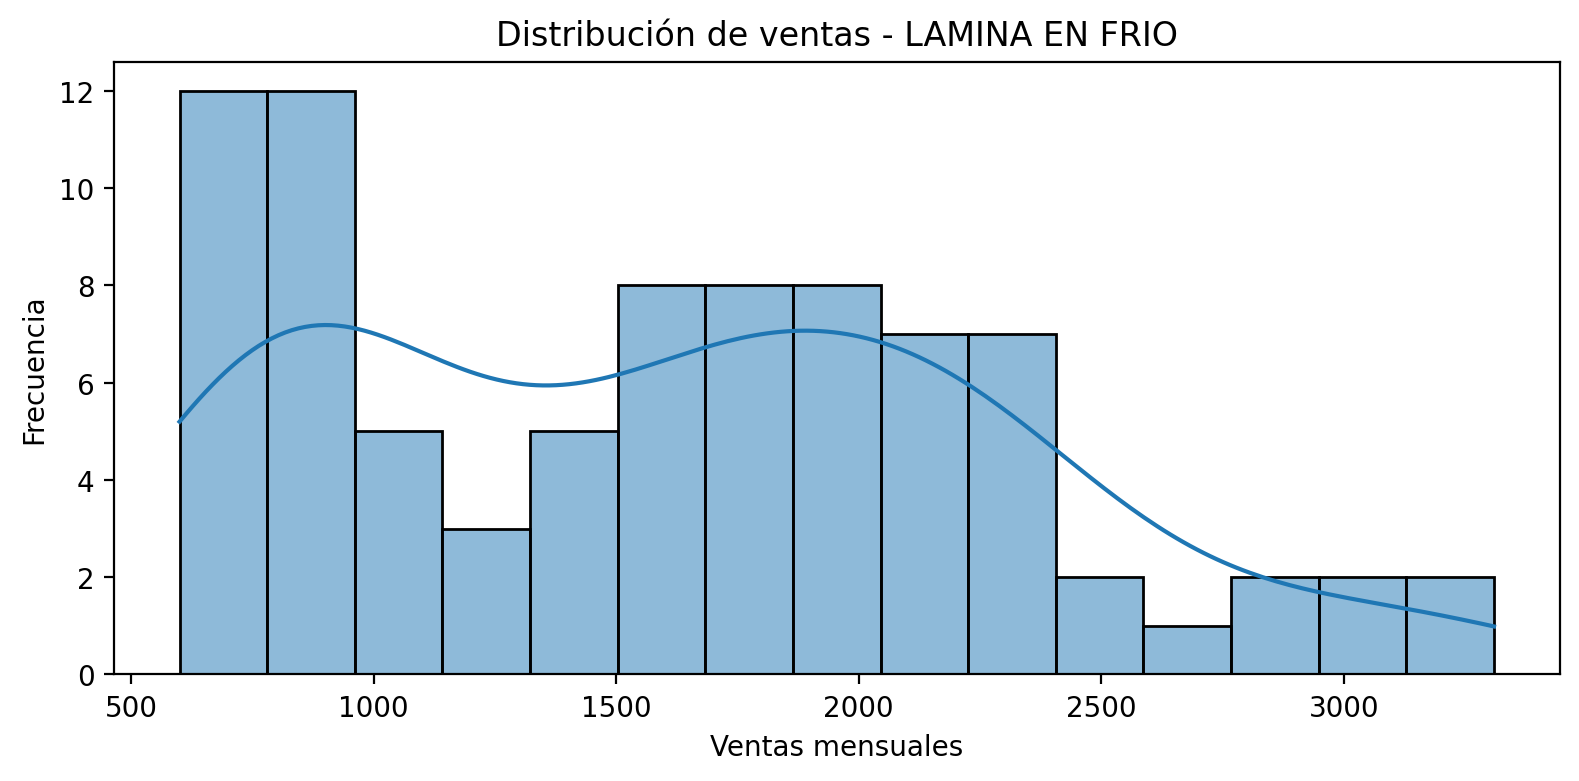

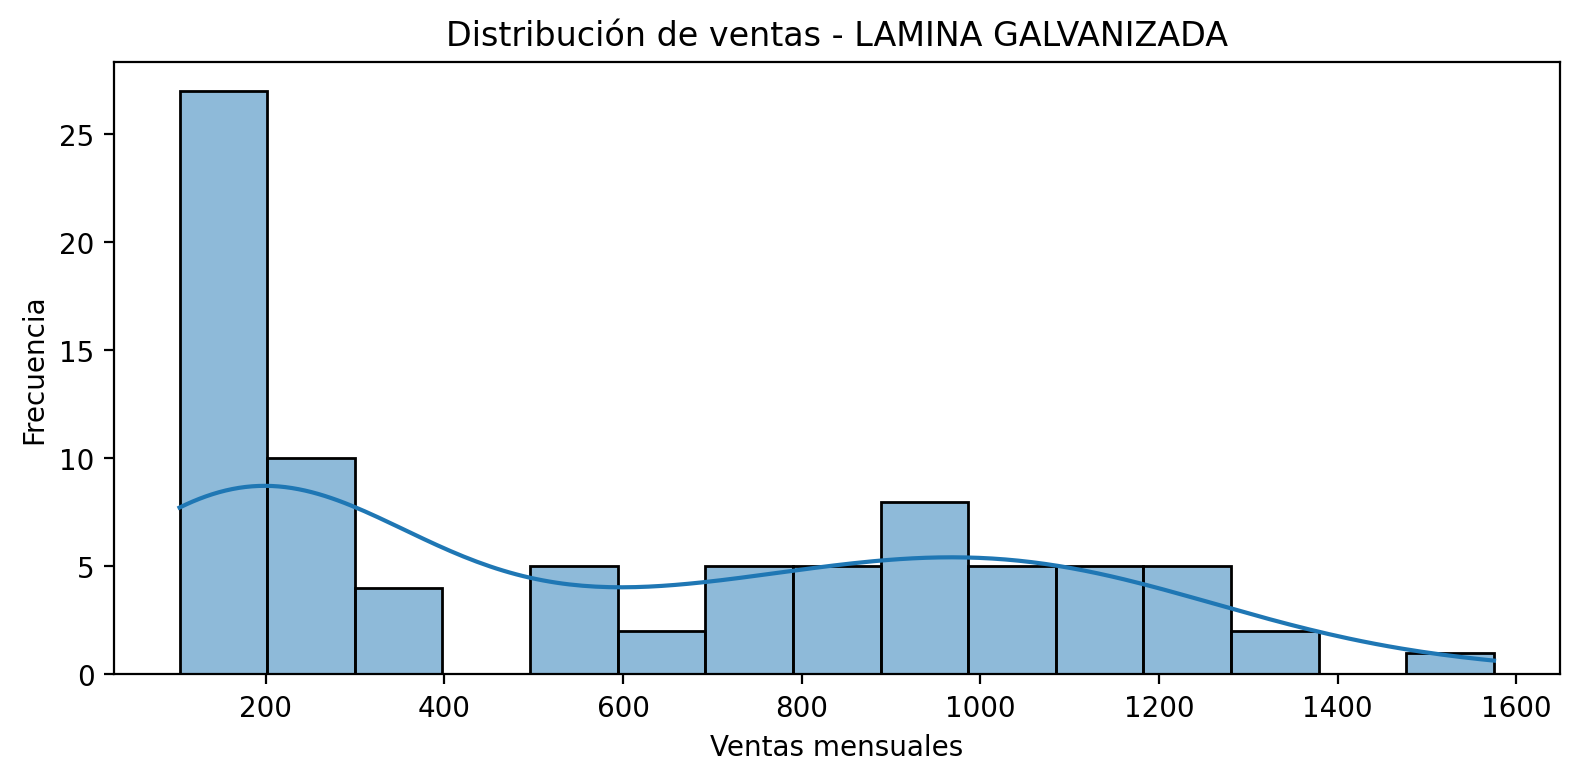

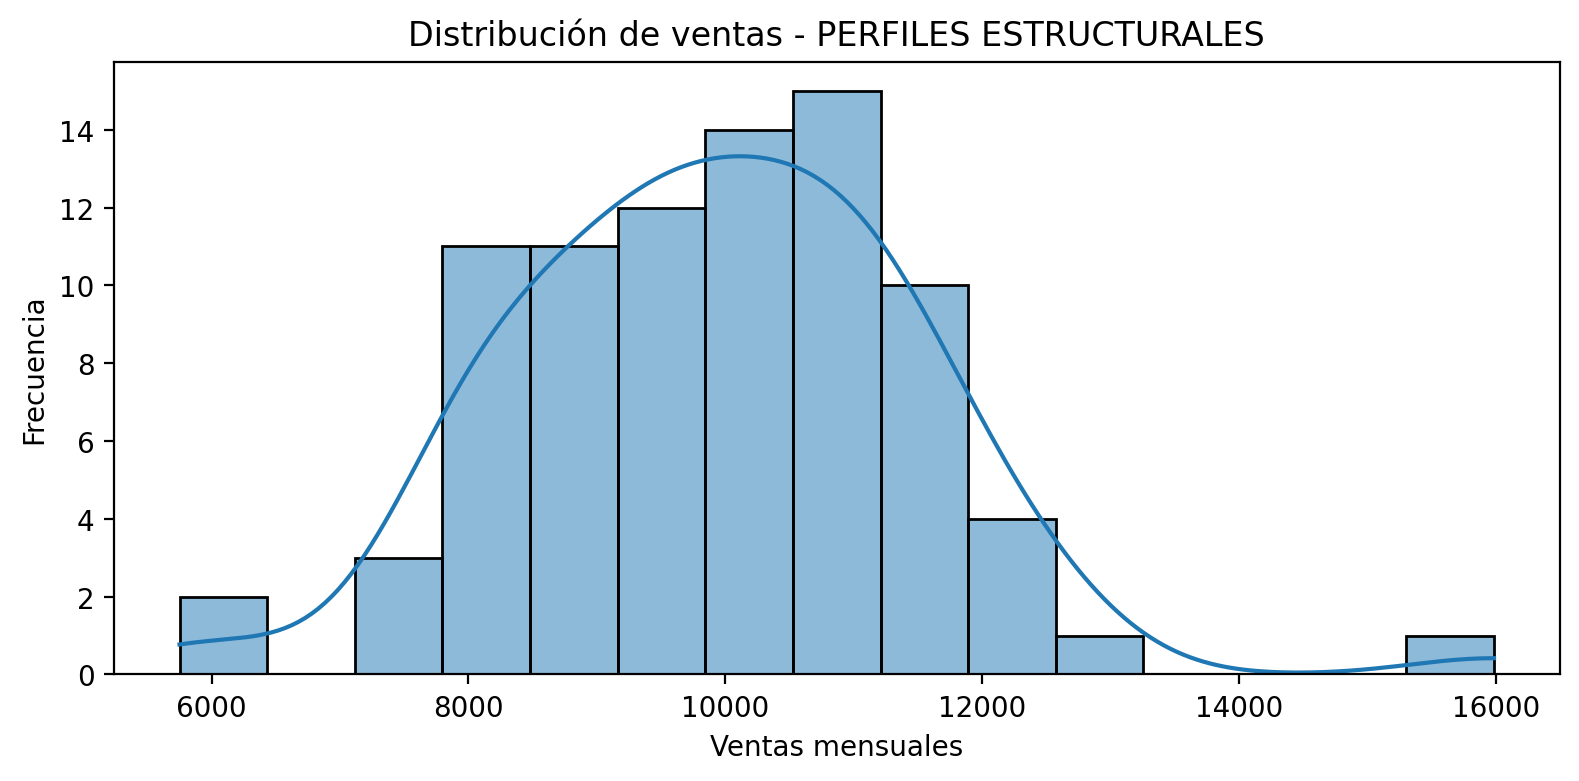

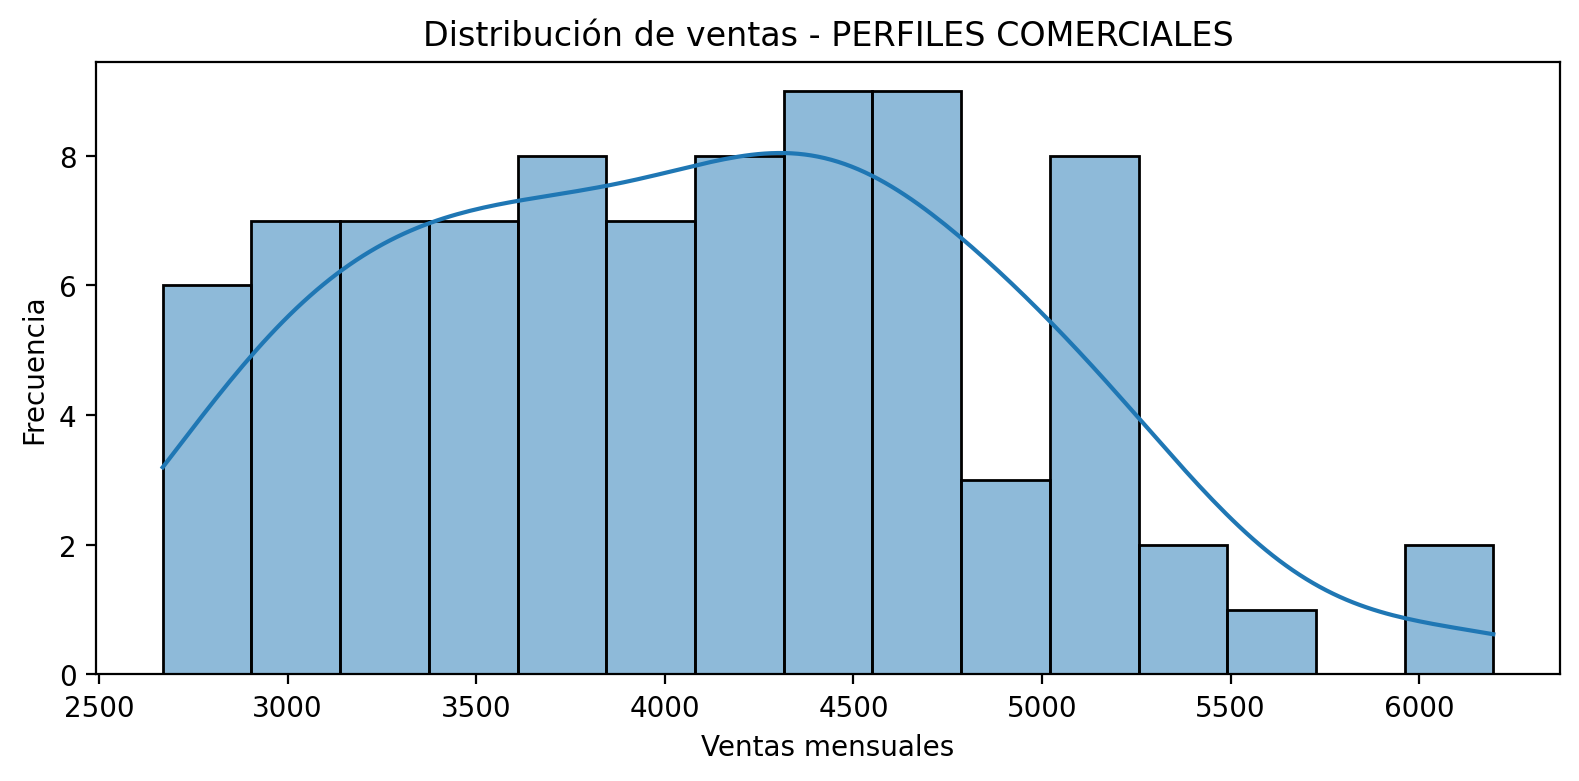

In [61]:
# Histogramas de productos
productos = ventas_long["Producto"].unique()

for producto in productos:
    plt.figure(figsize=(8, 4))
    subset = ventas_long[ventas_long["Producto"] == producto]
    sns.histplot(subset["Ventas"], kde=True, bins=15)
    plt.title(f"Distribución de ventas - {producto}")
    plt.xlabel("Ventas mensuales")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

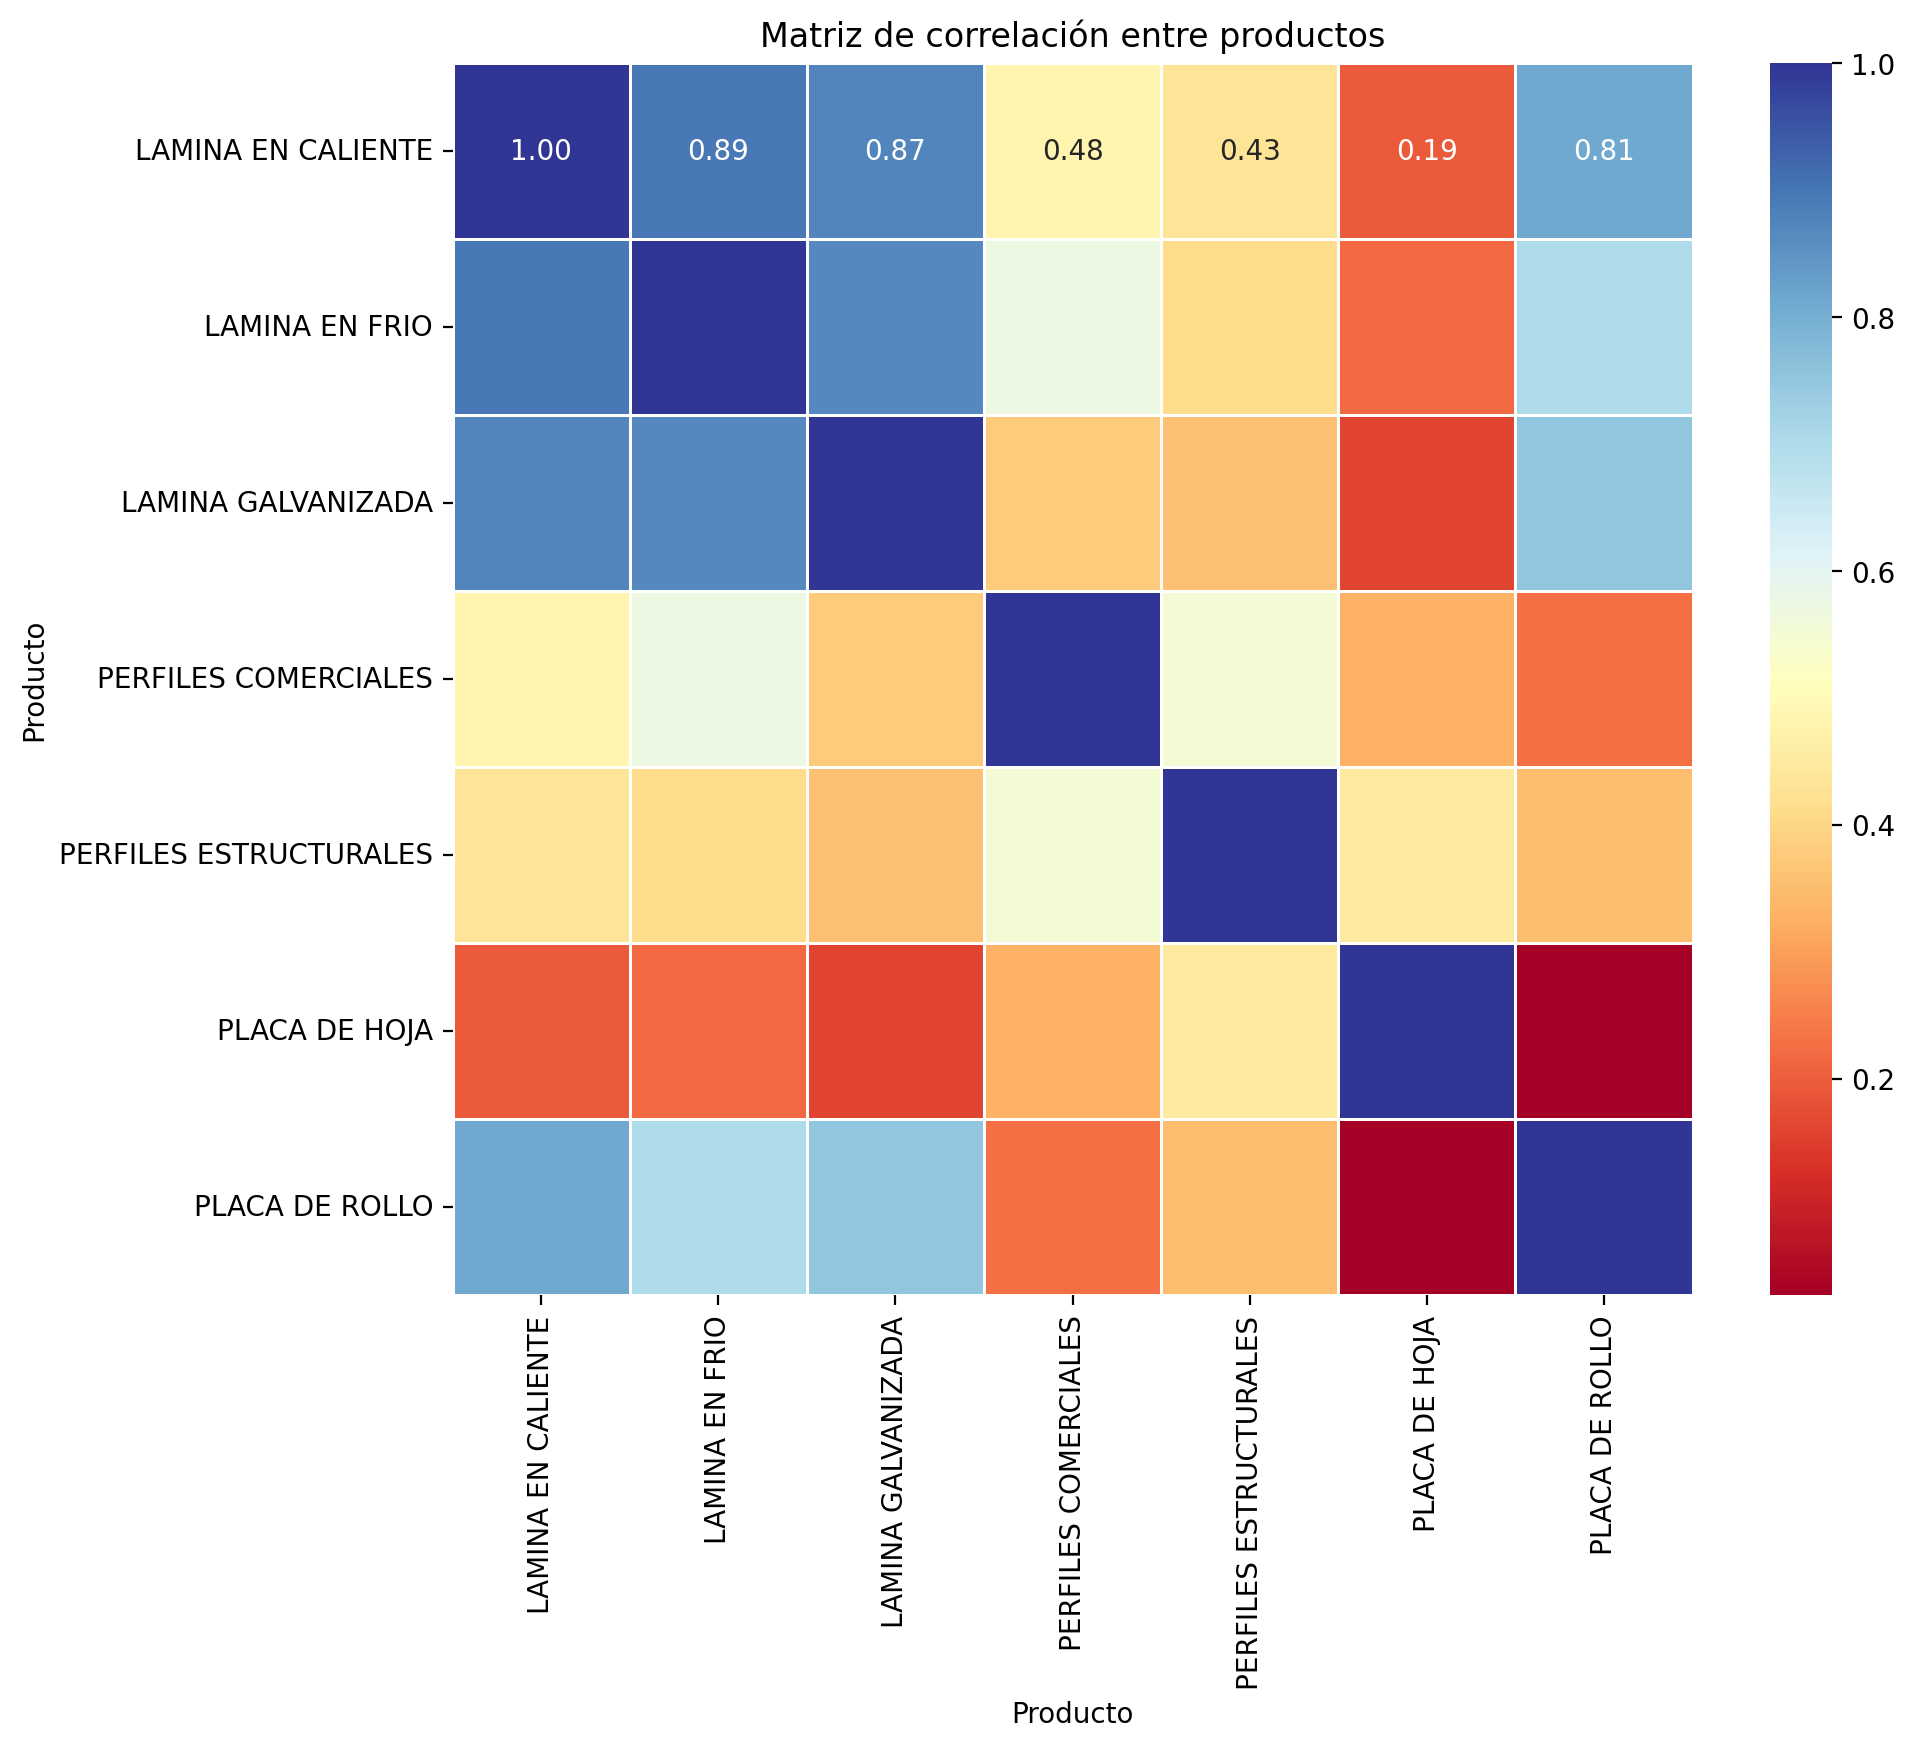

In [62]:
# Heatmap de la correlacion
ventasHM = ventas_long.pivot(index="Fecha", columns="Producto", values="Ventas")

plt.figure(figsize=(10, 8))
sns.heatmap(ventasHM.corr(), annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Matriz de correlación entre productos")
plt.show()

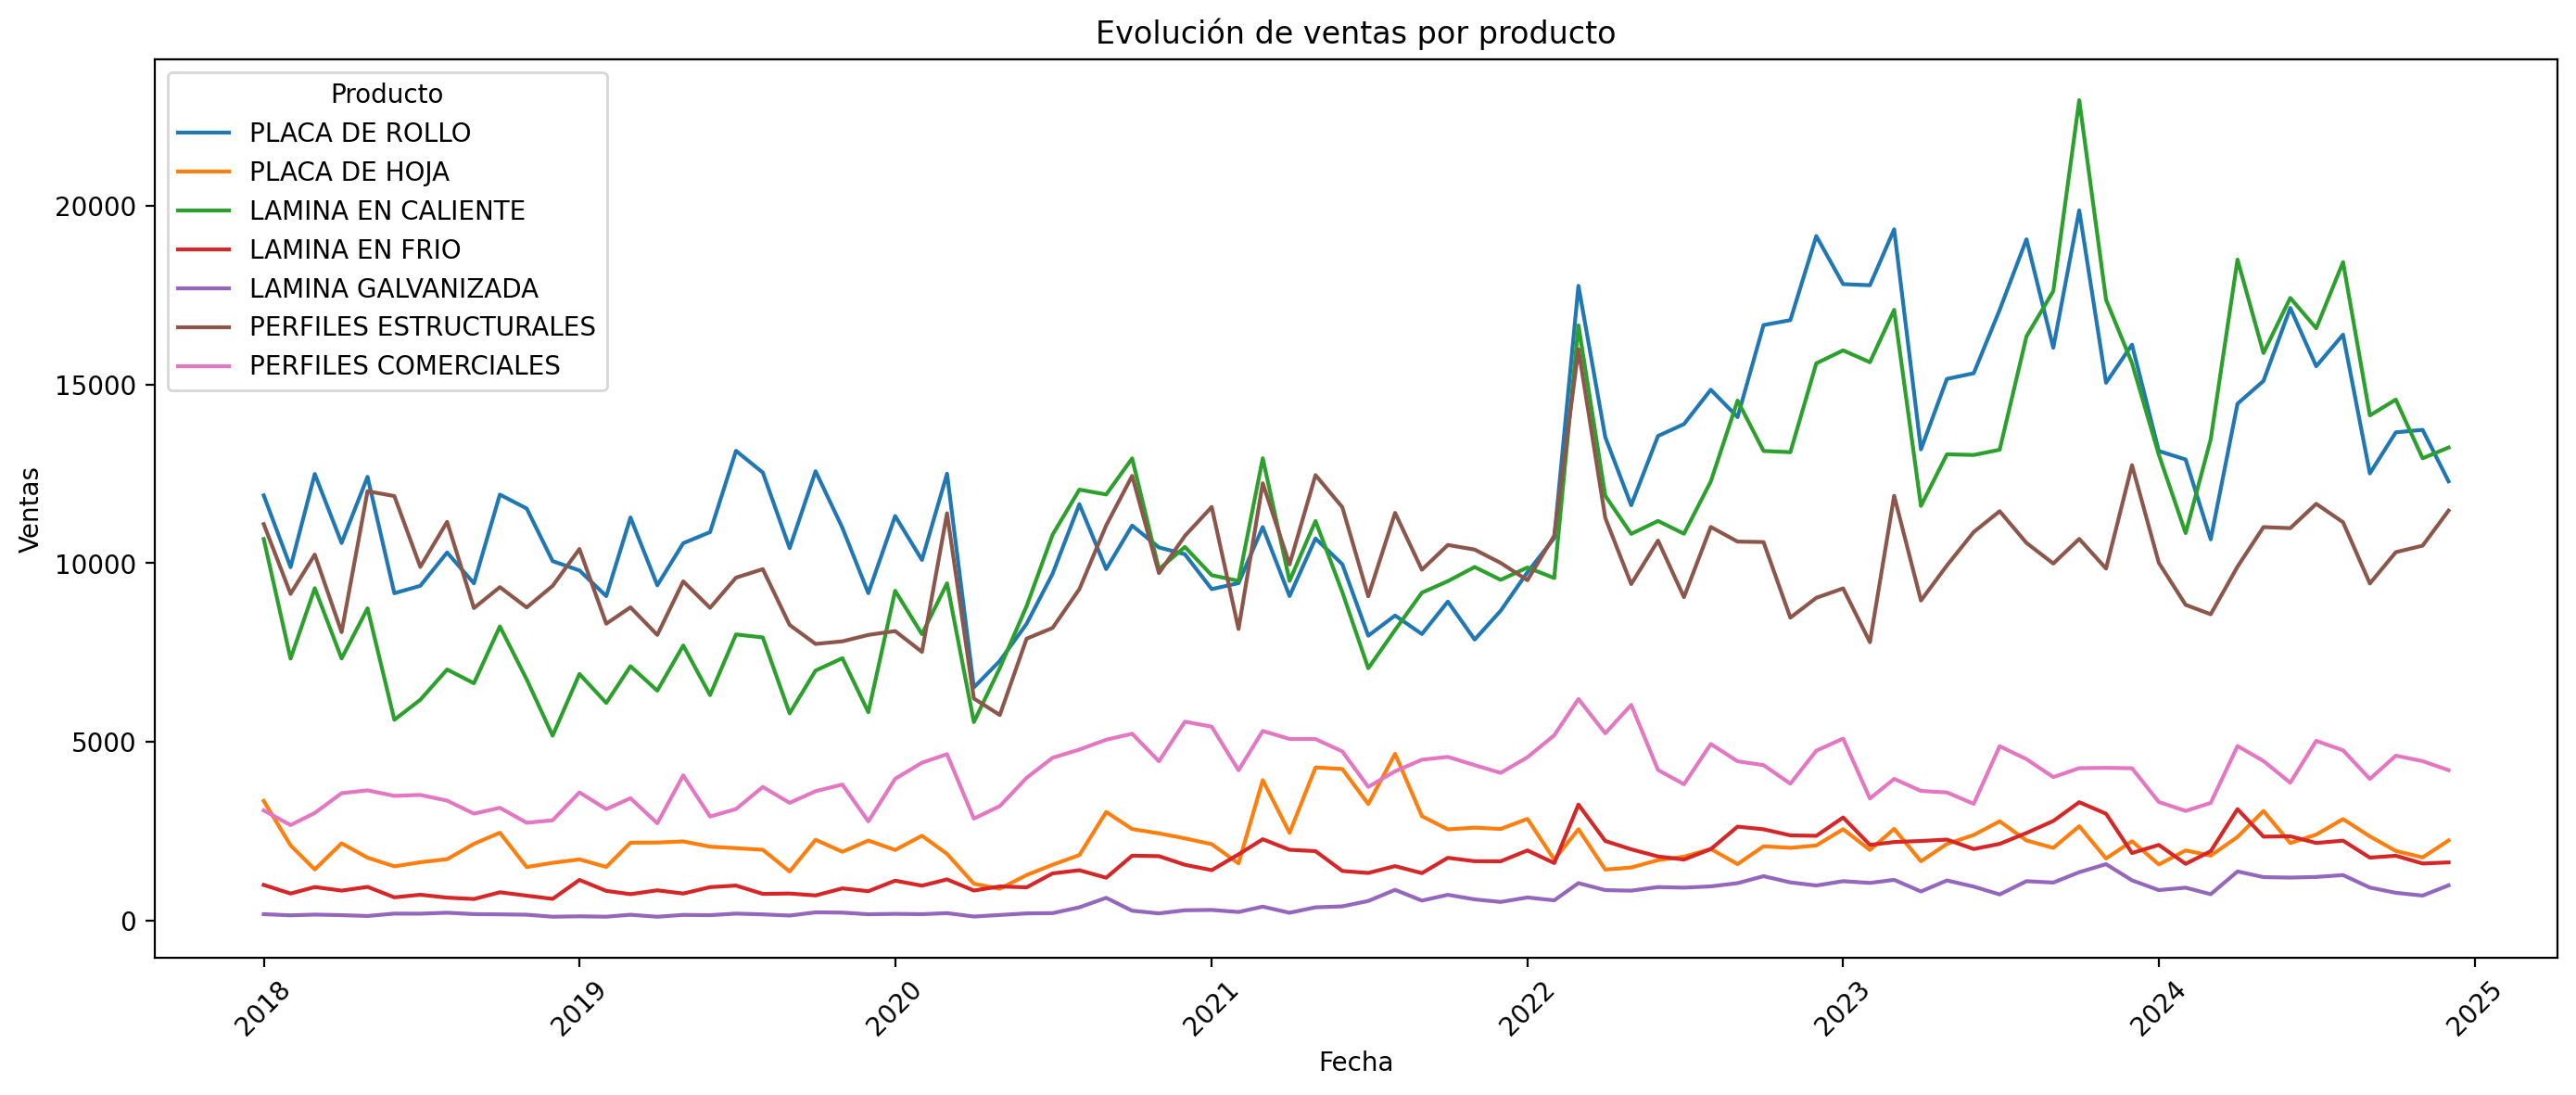

In [63]:
# Evolucion de ventas por producto
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_long, x="Fecha", y="Ventas", hue="Producto")
plt.title("Evolución de ventas por producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
